# Neural networks with PyTorch

Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module `nn` that provides a nice way to efficiently build large neural networks.

In [74]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import helper

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from torchvision import datasets , transforms

In [ ]:
# Defining a transformer to normalise the data
transformer = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5,0.5,0.5) , (0.5,0.5,0.5))])

In [ ]:
trainSet = datasets.MNIST('MNIST_data' , download=True , train=True , transform=transformer)
trainLoader = torch.utils.data.dataloader(trainSet , batch_size = 64 , shuffle = True)

In [3]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_Data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


We have the training data loaded into `trainloader` and we make that an iterator with `iter(trainloader)`. Later, we'll use this to loop through the dataset for training, like

```python
for image, label in trainloader:
    ## do things with images and labels
```

You'll notice I created the `trainloader` with a batch size of 64, and `shuffle=True`. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a *batch*. And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that `images` is just a tensor with size `(64, 1, 28, 28)`. So, 64 images per batch, 1 color channel, and 28x28 images.

In [4]:
dataiter = iter(trainloader)
images , labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


## Tensor -> Numpy -> Squeeze

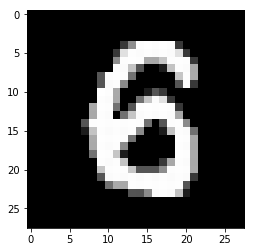

In [6]:
plt.imshow(images[1].numpy().squeeze() , cmap = 'gray')

# Exercise 1
> Flatten the batch of images `images`. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [9]:
def activation(x):
    return 1/(1 + torch.exp(-x))

#Flattening
inputs = images.view(images.shape[0],-1)#shape0 gives batches
inputUnits = 784
hiddenUnits = 256
outputUnits = 10

w1 = torch.randn(inputUnits , hiddenUnits)
b1 = torch.randn(hiddenUnits)

w2 = torch.randn(hiddenUnits , outputUnits)
b2 = torch.randn(outputUnits)

h = activation(torch.mm(inputs , w1) + b1)

out = torch.mm(h , w2) + b2

In [11]:
out.shape #BatchSize 64

torch.Size([64, 10])

In [23]:
#print(out)
def softmaxActivation(x):
    #print(x.shape) = > 64 x 10
    # we want the sum of exp along a row
    numerator = torch.exp(x)
    print(numerator.shape)
    denominator = torch.sum(torch.exp(x) , dim = 1).view(-1,1)# View for converting 1D to 2D
    print(denominator.shape)
    return numerator/denominator

In [25]:
probabilities = softmaxActivation(out)

torch.Size([64, 10])
torch.Size([64, 1])


In [26]:
probabilities.shape

torch.Size([64, 10])

In [28]:
probabilities.sum(dim=1)# Summing up all the values in a row

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

## Building networks with PyTorch

PyTorch provides a module `nn` that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [29]:
from torch import nn

In [33]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()#of nn.module # To link this class to the nn.Module
        # Without this you won't be able to do anything
        
        '''nn.Linear will multiply the weights and add bias'''
        
        #Inputs to hidden layer Linear transformation
        self.hidden = nn.Linear(784 , 256)
        
        #Hidden to Output layer Linear transformation
        self.output = nn.Linear(256 , 10)
        
        
        #Defining sigmoid activation & softmax output
        
        self.sigmoid = nn.Sigmoid()
        
        self.softmax = nn.Softmax(dim = 1) #for taking sum across row
        
    def forward(self , x):
        # Pass the input tensor through each of the operations
        
        x = self.hidden(x)
        x = self.sigmoid(x)
        
        x = self.output(x)
        x = self.softmax(x)
        
        return x
        
        

## Creating object of Network

In [37]:
Model = Network()

In [38]:
Model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

 > making use of
 # F
 > For Cleaner Code

In [42]:
import torch.nn.functional as F

class network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
    def forward(self,x):
        #Hidden layer with sigmoid
        x = F.sigmoid(self.hidden(x))
        
        #Output layer with softmax
        x = F.softmax(self.output(x) , dim=1)
        
        return x
        
    

In [43]:
model = network()

In [44]:
model

network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

# Excercise 2
> Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use `fc1`, `fc2`, and `fc3` as your layer names.

In [46]:
class ownNetork(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.fc1 = nn.Linear(784 , 128)
        self.fc2 = nn.Linear(128 , 64)
        self.fc3 = nn.Linear(64 , 10)
        
    def forward(self , x):
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        
        x = F.softmax(self.fc3(x) , dim=1)
        
        return x
        
        
    

In [47]:
ownObject = ownNetork()

In [48]:
ownObject

ownNetork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [49]:
ownObject.fc1.weight

Parameter containing:
tensor([[ 0.0162, -0.0017,  0.0311,  ..., -0.0126, -0.0175,  0.0170],
        [-0.0191,  0.0190, -0.0200,  ...,  0.0073,  0.0328,  0.0048],
        [-0.0077,  0.0104,  0.0215,  ...,  0.0014, -0.0276,  0.0252],
        ...,
        [-0.0031, -0.0103, -0.0145,  ...,  0.0344, -0.0301,  0.0308],
        [-0.0001,  0.0233,  0.0086,  ...,  0.0218, -0.0351,  0.0231],
        [-0.0343, -0.0005, -0.0354,  ..., -0.0036, -0.0031,  0.0181]],
       requires_grad=True)

In [50]:
ownObject.fc1.bias

Parameter containing:
tensor([-0.0114, -0.0020,  0.0085,  0.0228, -0.0058,  0.0242, -0.0277,  0.0087,
         0.0220, -0.0049, -0.0131, -0.0303, -0.0021,  0.0341,  0.0178, -0.0015,
         0.0227, -0.0142, -0.0219,  0.0055, -0.0043, -0.0219,  0.0031, -0.0109,
        -0.0308, -0.0127,  0.0221, -0.0013, -0.0093, -0.0125,  0.0319, -0.0321,
        -0.0016, -0.0068, -0.0012,  0.0175, -0.0186,  0.0244,  0.0131, -0.0031,
         0.0025,  0.0312, -0.0277, -0.0204,  0.0276,  0.0038, -0.0270, -0.0110,
         0.0139,  0.0032, -0.0168,  0.0203, -0.0027, -0.0114, -0.0035, -0.0233,
         0.0004,  0.0190,  0.0034, -0.0067, -0.0111, -0.0254, -0.0058,  0.0113,
         0.0299, -0.0202,  0.0247,  0.0043, -0.0335, -0.0342, -0.0126, -0.0310,
         0.0309,  0.0230, -0.0034, -0.0259,  0.0036,  0.0331, -0.0155, -0.0094,
         0.0325, -0.0340, -0.0166,  0.0228,  0.0050, -0.0201, -0.0234,  0.0160,
        -0.0304, -0.0122, -0.0201, -0.0257,  0.0168, -0.0333, -0.0351,  0.0197,
         0.0071,  

In [52]:
# Set bias to Zero #INplace
ownObject.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
# sample from random normal with standard dev = 0.01
ownObject.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0074,  0.0052, -0.0085,  ...,  0.0031,  0.0044,  0.0181],
        [-0.0016, -0.0027, -0.0009,  ...,  0.0019, -0.0026, -0.0037],
        [ 0.0092, -0.0240, -0.0092,  ...,  0.0186,  0.0009, -0.0124],
        ...,
        [ 0.0156,  0.0130,  0.0064,  ..., -0.0276,  0.0131, -0.0066],
        [-0.0170,  0.0056, -0.0024,  ...,  0.0064,  0.0155, -0.0039],
        [-0.0008,  0.0106, -0.0016,  ..., -0.0101,  0.0243, -0.0060]])

# Forward Pass

In [54]:
dataiter = iter(trainloader)
images , labels = dataiter.next()

In [55]:
images.shape , labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [56]:
images.resize_(64 , 1 , 784)

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        ...,

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])

In [76]:
# Forward pass through the network

imageIndex = 0
ps = ownObject.forward(images[imageIndex , :])

img = images[imageIndex]

#helper.view_classify(img.view(-1,28,28) , ps)

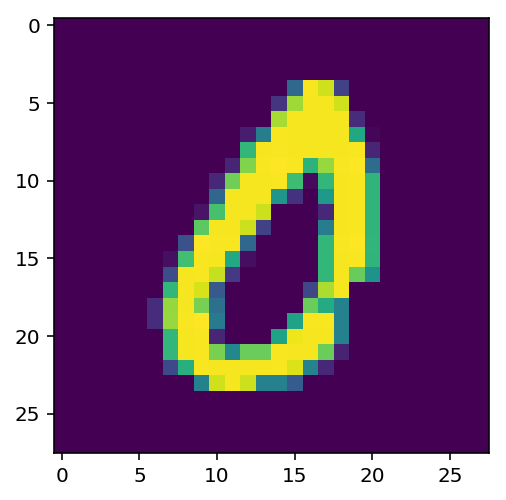

In [100]:
plt.imshow(img.reshape(28,28))

In [103]:
ps

tensor([[0.0940, 0.0932, 0.0977, 0.1147, 0.1030, 0.0919, 0.0928, 0.0997, 0.0988,
         0.1142]], grad_fn=<SoftmaxBackward>)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

### Using `nn.Sequential`

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential` ([documentation](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)). Using this to build the equivalent network:

In [113]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
#helper.view_classify(images[0].view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


The operations are availble by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use `model[0]`.

In [115]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0198, -0.0199, -0.0197,  ...,  0.0020,  0.0073,  0.0318],
        [ 0.0156, -0.0081, -0.0092,  ..., -0.0090, -0.0275, -0.0105],
        [ 0.0182, -0.0002,  0.0219,  ..., -0.0310, -0.0274, -0.0304],
        ...,
        [-0.0096, -0.0315,  0.0340,  ...,  0.0285, -0.0199,  0.0248],
        [ 0.0076,  0.0346, -0.0193,  ..., -0.0057,  0.0160,  0.0213],
        [-0.0311, -0.0308, -0.0265,  ..., -0.0117,  0.0014,  0.0075]],
       requires_grad=True)

You can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [116]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [128]:
model[0] , model[2]

(Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=128, out_features=64, bias=True))

In [126]:
model.fc1 , model.fc2

(Linear(in_features=784, out_features=128, bias=True),
 Linear(in_features=128, out_features=64, bias=True))